### Case Condition (Brief)

### Задание 1:  
***Имеется набор данных со следующими столбцами:***  
    1) Идентификатор документа  
    2) Идентификатор товара  
    3) Операция документа  
    4) Дата документа  
    5) Идентификатор филиала, создавшего документ  
    
> *Идентификатор товара – уникальный номер единицы товара, находящейся в сервисном центре*

Этот набор данных связан со справочником филиалов. Справочник содержит следующие поля:  
    1) Идентификатор филиала  
    2) Наименование филиала  
    3) Наименование региона филиала  
    
***Необходимо рассчитать среднее время нахождения товара в сервисном центре:   
    1) Общая динамика по месяцам   
    2) Динамика по неделям в разрезе регионов  
Вывести нормативный срок по всей компании.  
Графически представить динамику отклонения от нормы по каждому региону.***

### Задание 2:  
Вы работаете сотрудником, осуществляющим прием клиентов в сервисном центре.  
К вам пришел клиент.  
Какие варианты развития событий могут последовать далее?  
Опишите их.  

### Import libraries and Reading the data.

In [48]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [62]:
# Получение пути к файлам
catalog_path = "./data/Справочник.csv"
data_path = "./data/data.csv"

In [74]:
# Создание DF
catalog = pd.read_csv(catalog_path)
data = pd.read_csv(data_path)

### Review Data (Understanding the Data)

In [37]:
print(catalog.isnull().sum())
print(50 * "-")
print(data.isnull().sum())

Наименование филиала            0
Наименование региона филиала    0
Идентификатор филиала           0
dtype: int64
--------------------------------------------------
Идентификатор документа            0
Идентификатор товара               0
Вид операции документа             0
Дата документа                     0
Идентификатор филиалы документа    0
dtype: int64


In [5]:
catalog.head()

,Наименование филиала,Наименование региона филиала,Идентификатор филиала
0,Казань СЦ на Чистопольской,Верхняя Волга,"b'U\x8b\xecN\xb5\xe4\x02+\xcf\x9cT""ivr\n'"
1,Воткинск СЦ,Верхняя Волга,b'\xb5Mv\xe3\x86\xc3\x9a\x0b\x10\xb2\xba\xfa\x...
2,Чистополь СЦ,Верхняя Волга,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'"
3,Тверь СЦ,Центральный,b'\xe4\x04!)\xa7l\xb0B#=i\xf8\x89\x1a\x8b\x1f'
4,Рославль СЦ,Черноземье,b'\xb85\xa2\xe7\x1b\x8d\xd5\xff\x0bd>\xdcR:\xd...


In [33]:
data.head()

,Идентификатор документа,Идентификатор товара,Вид операции документа,Дата документа,Идентификатор филиалы документа
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...
1,b'O\x99\x903\x11Zd\x16\x8e\x00\xafM\xb8\x02\xa...,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',Прием товара,2019-01-01,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...
2,b'\xc3y\xdc\xf9\xc9\xe1\x0cC\x13U\xdby\xac\x97...,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,Прием товара,2019-01-01,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93'
3,b'9\xf4D`\x00\xf0\x00\xe3\xa8=\xea=N$\xf2\xc9',b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,Прием товара,2019-01-01,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...
4,b'\x10\x0b?\xd9ehT\x181\xed\xdd}\x1c(\x98`',b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,Прием товара,2019-01-01,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'"


In [77]:
data['Дата документа'] = pd.to_datetime(data['Дата документа'])

# "Неделя" в отдельную колонку
data['Неделя'] = data['Дата документа'].dt.week
# "Месяц" в отдельную колонку.
data['Месяц'] = data['Дата документа'].dt.month

In [78]:
data

,Идентификатор документа,Идентификатор товара,Вид операции документа,Дата документа,Идентификатор филиалы документа,Неделя,Месяц
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,1,1
1,b'O\x99\x903\x11Zd\x16\x8e\x00\xafM\xb8\x02\xa...,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',Прием товара,2019-01-01,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...,1,1
2,b'\xc3y\xdc\xf9\xc9\xe1\x0cC\x13U\xdby\xac\x97...,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,Прием товара,2019-01-01,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93',1,1
3,b'9\xf4D`\x00\xf0\x00\xe3\xa8=\xea=N$\xf2\xc9',b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,Прием товара,2019-01-01,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...,1,1
4,b'\x10\x0b?\xd9ehT\x181\xed\xdd}\x1c(\x98`',b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,Прием товара,2019-01-01,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'",1,1
...,...,...,...,...,...,...,...
2916592,b'\xb6\xeeyX\xaf\xbf\x08G\xaeK\xa0 \xca\x99\xe...,b'`^\x94\t\xe6=\xc8)Uy8B\xcbH\x92n',Выдача товара,2020-01-01,b'CJ\x8c\xe3\x99-\xa3\xf2c^\xa0\x98\x81u\x14~',1,1
2916593,b'L\xc2F\x8f 7\x08\xc2\xcd\x01\xa85@\xc1g\xbc',"b'\xee\xec\x1fwz#$\xf4,1\x7fx_O0r'",Выдача товара,2020-01-01,b'=\xd6\xc8\x13\xa4\xc9\x93\xb4:^\x1f~\x7f\xc3N>',1,1
2916594,b'3U>\xbf\xd3%$\xda-T\xad\x9f\xcb\x8a\xfd\x8b',b'\x0c|Y\xdc\xea~\x1f\xb5\x02T\xc6%\xc9\x00G\xca',Выдача товара,2020-01-01,b'%Dkr\xf5\xc1\x00\xeci\xe84\x81D\x9c7:',1,1
2916595,b'\x13\xf6\xaeW\xb4\x02\x13\xcc\xaas\xcd\xb3\x...,b'?\xc3\x96y{\xb4\xebe\xf9\x89\xf5u\x11\x92\x8...,Выдача товара,2020-01-01,b'm\x8b\x1f\xf0\xb5n\x9ea\xba\xac\xa4\x0cQ\xed...,1,1


### Splitting data.
>Разделяю данные по признаку (Вид операции документа) на два новых Датасета.

In [79]:
# Получение фрейма по признаку (Вид операции документа == Прием товара) 
df_acceptance_of_goods = pd.concat([
    data['Идентификатор документа'],
    data['Идентификатор товара'],
    data['Вид операции документа'].loc[data['Вид операции документа'] == 'Прием товара'],
    data['Дата документа'].loc[data['Вид операции документа'] == 'Прием товара'], 
    data['Неделя'].loc[data['Вид операции документа'] == 'Прием товара'],
    data['Месяц'].loc[data['Вид операции документа'] == 'Прием товара'],
    data['Идентификатор филиалы документа']
], axis=1)

# Удаление несоответствующих эл-тов списка.
df_acceptance_of_goods = df_acceptance_of_goods.dropna()

df_acceptance_of_goods.head()

,Идентификатор документа,Идентификатор товара,Вид операции документа,Дата документа,Неделя,Месяц,Идентификатор филиалы документа
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,1.0,1.0,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...
1,b'O\x99\x903\x11Zd\x16\x8e\x00\xafM\xb8\x02\xa...,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',Прием товара,2019-01-01,1.0,1.0,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...
2,b'\xc3y\xdc\xf9\xc9\xe1\x0cC\x13U\xdby\xac\x97...,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,Прием товара,2019-01-01,1.0,1.0,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93'
3,b'9\xf4D`\x00\xf0\x00\xe3\xa8=\xea=N$\xf2\xc9',b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,Прием товара,2019-01-01,1.0,1.0,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...
4,b'\x10\x0b?\xd9ehT\x181\xed\xdd}\x1c(\x98`',b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,Прием товара,2019-01-01,1.0,1.0,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'"


In [80]:
# Получение фрейма по признаку (Вид операции документа == Выдача товара) 
df_exit_of_goods_from_service_1 = pd.concat([    
    data['Идентификатор товара'], 
    data['Дата документа'].loc[data['Вид операции документа'] == 'Выдача товара'], 
    data['Неделя'].loc[data['Вид операции документа'] == 'Выдача товара'],
    data['Месяц'].loc[data['Вид операции документа'] == 'Выдача товара'], 
    data['Вид операции документа'].loc[data['Вид операции документа'] == 'Выдача товара']
], axis=1)
# Удаление несоответствующих эл-тов списка.
df_exit_of_goods_from_service_1 = df_exit_of_goods_from_service_1.dropna()

df_exit_of_goods_from_service_1.head()

,Идентификатор товара,Дата документа,Неделя,Месяц,Вид операции документа
8217,b'\x87\x1e\xc6\xf3C\xdb\x0c\xc3\x8a\\`\xa1\xd4...,2019-01-02,1.0,1.0,Выдача товара
8218,b'\xad@\xa8\x97\xdf\x80\x08\xd1Pz\xe2\xc6H/C\x83',2019-01-02,1.0,1.0,Выдача товара
8219,b'n8\x95\xf6(D\xe8\x82F\x07\xba\xb2\xa1\x90\x0...,2019-01-02,1.0,1.0,Выдача товара
8220,b'\x16i\x91\x86\x93/d\xd4\xe8\xc05B\x9b\x0e\x1...,2019-01-02,1.0,1.0,Выдача товара
8221,b'\xa0\xaf\xccR[J\x1ea\xfcj\x03+\xe5VSx',2019-01-02,1.0,1.0,Выдача товара


In [81]:
# Левое соединение двух фреймов по колонне "Идентификатор товара".
df_list_of_received_and_issued = df_acceptance_of_goods.merge(df_exit_of_goods_from_service_1, left_on='Идентификатор товара', right_on='Идентификатор товара')
df_list_of_received_and_issued.head()

,Идентификатор документа,Идентификатор товара,Вид операции документа_x,Дата документа_x,Неделя_x,Месяц_x,Идентификатор филиалы документа,Дата документа_y,Неделя_y,Месяц_y,Вид операции документа_y
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,1.0,1.0,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,2019-01-20,3.0,1.0,Выдача товара
1,b'O\x99\x903\x11Zd\x16\x8e\x00\xafM\xb8\x02\xa...,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',Прием товара,2019-01-01,1.0,1.0,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...,2019-01-18,3.0,1.0,Выдача товара
2,b'\xc3y\xdc\xf9\xc9\xe1\x0cC\x13U\xdby\xac\x97...,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,Прием товара,2019-01-01,1.0,1.0,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93',2019-02-04,6.0,2.0,Выдача товара
3,b'9\xf4D`\x00\xf0\x00\xe3\xa8=\xea=N$\xf2\xc9',b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,Прием товара,2019-01-01,1.0,1.0,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...,2019-01-27,4.0,1.0,Выдача товара
4,b'\x10\x0b?\xd9ehT\x181\xed\xdd}\x1c(\x98`',b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,Прием товара,2019-01-01,1.0,1.0,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'",2019-01-09,2.0,1.0,Выдача товара


#### Добавление колонки со сроками нахождения в СЦ.

In [45]:
# cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
#         'Price': [22000,25000,27000,35000]
#         }

# df = pd.DataFrame(cars, columns = ['Brand', 'Price'])

# max1 = df['Price'].max()
# print (max1)

# data = {'Дата': ['2019-01-01', '2012-02-13']}
# df = pd.DataFrame(data, columns=['Дата']).apply(pd.to_datetime) 
# df_week = pd.DataFrame(df['Дата'].dt.week)
# df_week

In [82]:
# Добавление новой колонки со сроками нахождения в СЦ.
df_list_of_received_and_issued['Срок(дней)'] = (df_list_of_received_and_issued['Дата документа_y'] - df_list_of_received_and_issued['Дата документа_x']).dt.days

In [83]:
df_list_of_received_and_issued

,Идентификатор документа,Идентификатор товара,Вид операции документа_x,Дата документа_x,Неделя_x,Месяц_x,Идентификатор филиалы документа,Дата документа_y,Неделя_y,Месяц_y,Вид операции документа_y,Срок(дней)
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,1.0,1.0,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,2019-01-20,3.0,1.0,Выдача товара,19
1,b'O\x99\x903\x11Zd\x16\x8e\x00\xafM\xb8\x02\xa...,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',Прием товара,2019-01-01,1.0,1.0,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...,2019-01-18,3.0,1.0,Выдача товара,17
2,b'\xc3y\xdc\xf9\xc9\xe1\x0cC\x13U\xdby\xac\x97...,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,Прием товара,2019-01-01,1.0,1.0,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93',2019-02-04,6.0,2.0,Выдача товара,34
3,b'9\xf4D`\x00\xf0\x00\xe3\xa8=\xea=N$\xf2\xc9',b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,Прием товара,2019-01-01,1.0,1.0,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...,2019-01-27,4.0,1.0,Выдача товара,26
4,b'\x10\x0b?\xd9ehT\x181\xed\xdd}\x1c(\x98`',b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,Прием товара,2019-01-01,1.0,1.0,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'",2019-01-09,2.0,1.0,Выдача товара,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1416807,"b'\xdc\xb2\x95x\xd8\xda\xb42\xf3%\xf1""\x9f\x93...",b'\x80WF\xac\xda8\xa7\xa6\xe1\xb4\xa7\x84\xae8...,Прием товара,2019-12-31,1.0,12.0,b'Y7\xed\x11\xf7\xae\xbc\xca\x9dh\xf4IH\\gL',2020-01-01,1.0,1.0,Выдача товара,1
1416808,b'\xb0\x02\xc0N\xc7\xea\r\xf3\x9bc4\xbe\xbb\xa...,b'\xbb\xa8\xea\xa9<\xe3\xe7\xe9W\x87\x18\x81:\...,Прием товара,2019-12-31,1.0,12.0,"b'U\x8b\xecN\xb5\xe4\x02+\xcf\x9cT""ivr\n'",2020-01-01,1.0,1.0,Выдача товара,1
1416809,b'\t\xc4\xd6q\xcb\x12\xc3cv\xd6\xe1F1\x1b\xa7\...,b'\x01\xfb\xd2f%Yr\x85e:\x18M\xbf\xa0\xacj',Прием товара,2019-12-31,1.0,12.0,b'm\x8b\x1f\xf0\xb5n\x9ea\xba\xac\xa4\x0cQ\xed...,2020-01-01,1.0,1.0,Выдача товара,1
1416810,b'\x9f\xeb\xc9)\x12\x9a\xc0\xd8\xe0\xa2\xd2\xa...,"b'B\xa2\x90\x199?,\xdd8GG\x9a\x97v\xc6X'",Прием товара,2019-12-31,1.0,12.0,b'2\xffB\x9c#\xc9\x95\xb3D\t\x86\xe8\x87l\xecY',2020-01-01,1.0,1.0,Выдача товара,1


In [87]:
mean_days_by_month = pd.DataFrame(df_list_of_received_and_issued.groupby('Срок(дней)').mean()).reset_index()
mean_days_by_month

,Срок(дней),Неделя_x,Месяц_x,Неделя_y,Месяц_y
0,1,26.523269,6.545880,26.523639,6.549992
1,2,26.441625,6.495175,26.460251,6.526927
2,3,26.606961,6.504763,26.599825,6.563369
3,4,26.383808,6.456232,26.553786,6.551425
4,5,26.347115,6.445548,26.634239,6.565734
5,6,26.369222,6.454052,26.808288,6.605175
6,7,26.263427,6.430420,26.815505,6.610831
7,8,26.110821,6.395493,26.745983,6.604576
8,9,26.165136,6.406575,27.025127,6.654262
9,10,26.062461,6.388207,27.069009,6.660062


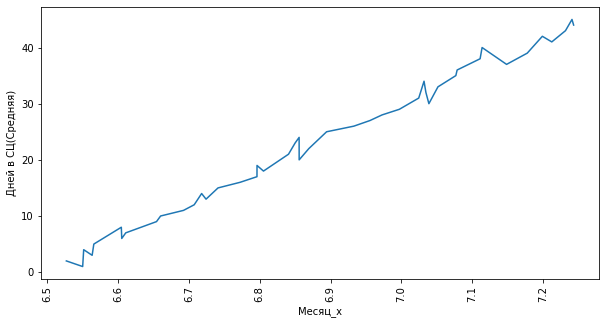

In [91]:
# Вывод результата на график.
plt.figure(figsize=(10,5))
ax = sns.lineplot(x=mean_days_by_month['Месяц_y'], y=mean_days_by_month['Срок(дней)'], data=mean_days_by_month)
plt.xlabel('Месяц_x')
plt.ylabel('Дней в СЦ(Средняя)')
plt.xticks(rotation=90);

In [92]:
df_mean = pd.DataFrame(df_month['Срок(дней)'].value_counts().sort_index())
df_month = 0
                                              
for i in range(1, 13):   
    
    df_month = df_list_of_received_and_issued.loc[df_list_of_received_and_issued['Месяц'] == i]
    
    df_mean[f'{i}'] = pd.DataFrame(df_month['Срок(дней)'].value_counts().sort_index())

# df_mean = df_mean.reset_index()
# df_mean.rename(columns={'index': 'Дней в СЦ'},inplace=True)
df_mean = df_mean.drop(columns='Срок(дней)')
df_mean.head()

NameError: name 'df_month' is not defined

In [22]:
# Вывод на график
# Вывод результата на график.
plt.figure(figsize=(16,6))
sns.lineplot(data=df_mean)
plt.xlabel('Дней в СЦ')
plt.ylabel('Колличество заявлений');

NameError: name 'df_mean' is not defined

<Figure size 1152x432 with 0 Axes>